In [1]:
import numpy as np
import matplotlib.pyplot as plt
from powerspectra import Powerspectra
from cosmology import Cosmology
from scipy.interpolate import InterpolatedUnivariateSpline
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('figure', facecolor='w')

In [2]:
omega_Ls, omega_ps = Cosmology().get_postborn_omega_ps(ellmax=8000)
omega_spline = InterpolatedUnivariateSpline(omega_Ls, omega_ps)

In [3]:
def get_bias(bi_typ, fields, gmv, exp="SO"):
    gmv_str = "gmv" if gmv else "single"
    folder = f"_results/bias_results/{exp}/{fields}_{gmv_str}/{bi_typ}"
    Ls = np.load(folder+"/Ls.npy")
    N = np.load(folder+"/N.npy")
    return Ls, N

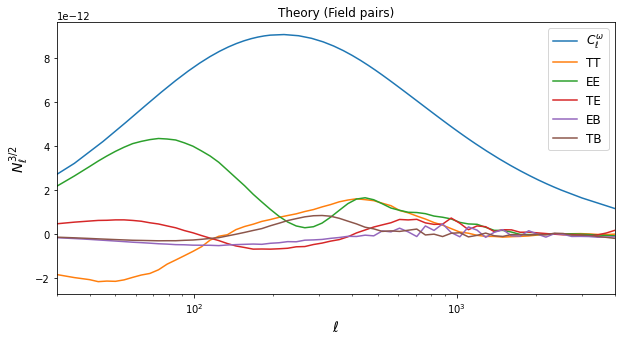

In [4]:
single_fields = ["TT", "EE", "TE", "EB", "TB"]
plt.semilogx(omega_Ls, omega_ps, label="$C_{\ell}^{\omega}$")
for field in single_fields:
    Ls, N = get_bias("theory", field, False)
    # plt.semilogx(Ls, N+omega_spline(Ls), linestyle="--")
    plt.semilogx(Ls, N, label=field)
plt.legend(prop={'size': 12})
plt.xlim(30, 4000)
plt.ylabel("$N^{3/2}_{\ell}$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("Theory (Field pairs)")
plt.show()

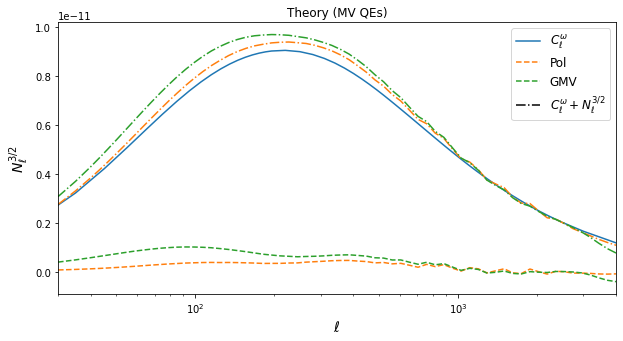

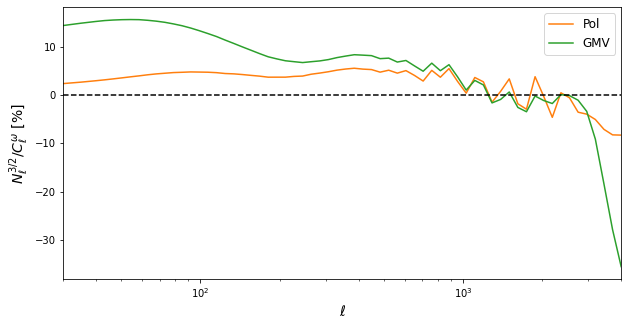

In [5]:
gmv_fields = ["EB","TEB"]
gmv_labels = ["Pol", "GMV"]
colors = [u'#ff7f0e', u'#2ca02c' ]
plt.semilogx(omega_Ls, omega_ps, label="$C_{\ell}^{\omega}$")
for iii, field in enumerate(gmv_fields):
    Ls, N = get_bias("theory", field, True)
    plt.semilogx(Ls, N+omega_spline(Ls), linestyle="dashdot", color=colors[iii])
    plt.semilogx(Ls, N, label=gmv_labels[iii], color=colors[iii], linestyle="--")
plt.plot(-1000, 1e-12, color="k", linestyle="dashdot", label="$C_{\ell}^{\omega}+N^{3/2}_{\ell}$")
plt.legend(prop={'size': 12})
plt.xlim(30, 4000)
plt.ylabel("$N^{3/2}_{\ell}$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("Theory (MV QEs)")

plt.figure()
for iii, field in enumerate(gmv_fields):
    Ls, N = get_bias("theory", field, True)
    plt.semilogx(Ls, 100*(N)/omega_spline(Ls), color=colors[iii], label=gmv_labels[iii])
plt.plot([30, 4000], [0, 0], "--", color="k")
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(30, 4000)
plt.ylabel("$N^{3/2}_{\ell}/C_{\ell}^{\omega}$ [%]", fontsize=14)
plt.legend(prop={'size': 12})
plt.show()

Text(0.5, 1.0, 'Theory (Field pairs)')

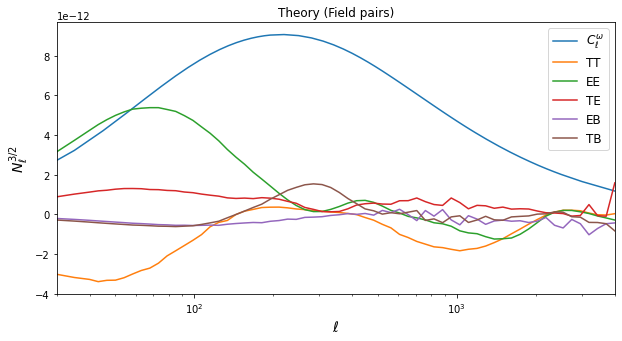

In [6]:
single_fields = ["TT", "EE", "TE", "EB", "TB"]
plt.semilogx(omega_Ls, omega_ps, label="$C_{\ell}^{\omega}$")
for field in single_fields:
    Ls, N = get_bias("kgI", field, False)
    # plt.semilogx(Ls, N+omega_spline(Ls), linestyle="--")
    plt.semilogx(Ls, N, label=field)
plt.legend(prop={'size': 12})
plt.xlim(30, 4000)
plt.ylabel("$N^{3/2}_{\ell}$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("LSS estimator (Field pairs)")

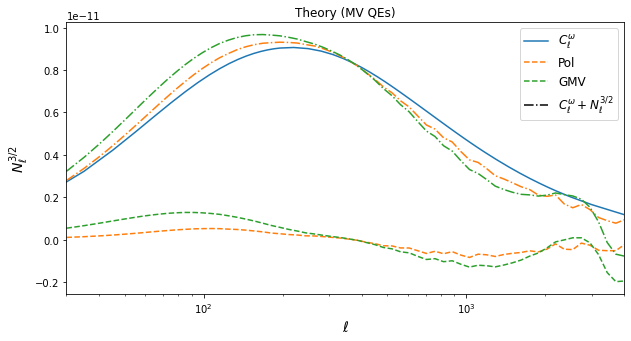

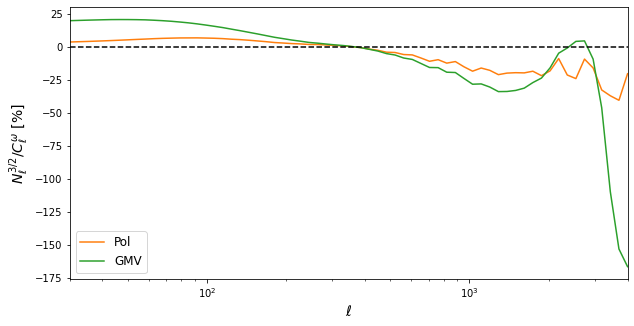

In [7]:
gmv_fields = ["EB","TEB"]
gmv_labels = ["Pol", "GMV"]
colors = [u'#ff7f0e', u'#2ca02c' ]
plt.semilogx(omega_Ls, omega_ps, label="$C_{\ell}^{\omega}$")
for iii, field in enumerate(gmv_fields):
    Ls, N = get_bias("kgI", field, True)
    plt.semilogx(Ls, N+omega_spline(Ls), linestyle="dashdot", color=colors[iii])
    plt.semilogx(Ls, N, label=gmv_labels[iii], color=colors[iii], linestyle="--")
plt.plot(-1000, 1e-12, color="k", linestyle="dashdot", label="$C_{\ell}^{\omega}+N^{3/2}_{\ell}$")
plt.legend(prop={'size': 12})
plt.xlim(30, 4000)
plt.ylabel("$N^{3/2}_{\ell}$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("LSS estimator (MV QEs)")

plt.figure()
for iii, field in enumerate(gmv_fields):
    Ls, N = get_bias("kgI", field, True)
    plt.semilogx(Ls, 100*(N)/omega_spline(Ls), color=colors[iii], label=gmv_labels[iii])
plt.plot([30, 4000], [0, 0], "--", color="k")
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(30, 4000)
plt.ylabel("$N^{3/2}_{\ell}/C_{\ell}^{\omega}$ [%]", fontsize=14)
plt.legend(prop={'size': 12})
plt.show()